In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
file = 'AirBNB.csv'
airbnb = pd.read_csv(file)
airbnb.head()

/var/folders/t8/783vz2r905x31dw82rypzlqw0000gn/T/ipykernel_11934/1539906352.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv(file)


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [3]:
airbnb.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

In [29]:
# preprocessing

# remove irrelevent collumns
irrelevant_columns = ['id', 'review_scores_rating', 'cancellation_policy', 'instant_bookable']
airbnb = airbnb.drop(columns=irrelevant_columns, errors='ignore')

# impute missing data
for column in airbnb.select_dtypes(include=['float64', 'int64']).columns:
    airbnb[column].fillna(airbnb[column].mean())
    
# encode string data
for column in airbnb.select_dtypes(exclude=['float64', 'int64']).columns:
    airbnb[column] = airbnb[column].astype('category').cat.codes

# drop rows with missing data
airbnb = airbnb.dropna()
    
print("Data has been cleaned")
non_na_counts = airbnb.notna().sum()
print("Feature-wise Non-NA Counts:\n", non_na_counts)
airbnb.head()

Data has been cleaned
Feature-wise Non-NA Counts:
 room_type       73762
accommodates    73762
bathrooms       73762
cleaning_fee    73762
bedrooms        73762
beds            73762
log_price       73762
dtype: int64


,room_type,accommodates,bathrooms,cleaning_fee,bedrooms,beds,log_price
0,1,3.0,1.0,2,1.0,1.0,5.010635
1,1,7.0,1.0,2,3.0,3.0,5.129899
2,1,5.0,1.0,2,1.0,3.0,4.976734
3,1,4.0,1.0,2,2.0,2.0,6.620073
4,1,2.0,1.0,2,0.0,1.0,4.744932


In [ ]:
# prepare data for logistic regression
X = airbnb.drop(columns=['log_price']) 
y = airbnb['log_price'] 

# split test and training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train Logistic Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.2480538417944602
R-squared Score: 0.5193772670065434


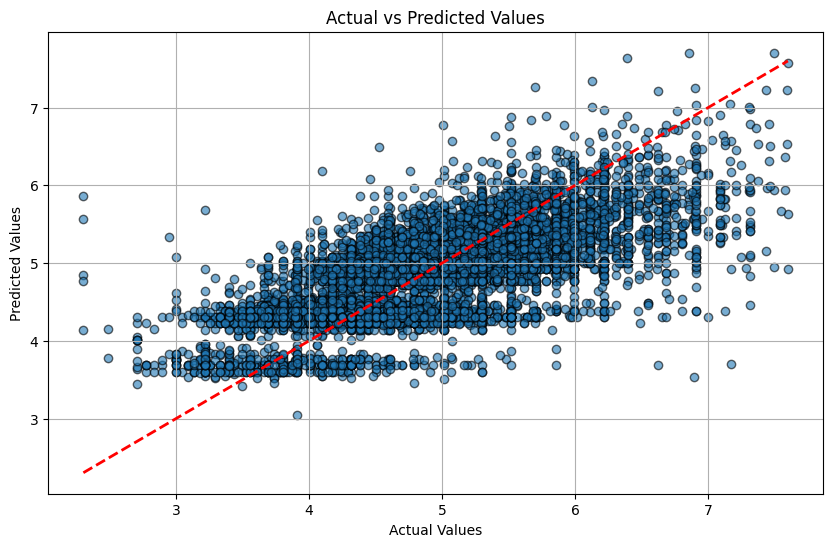

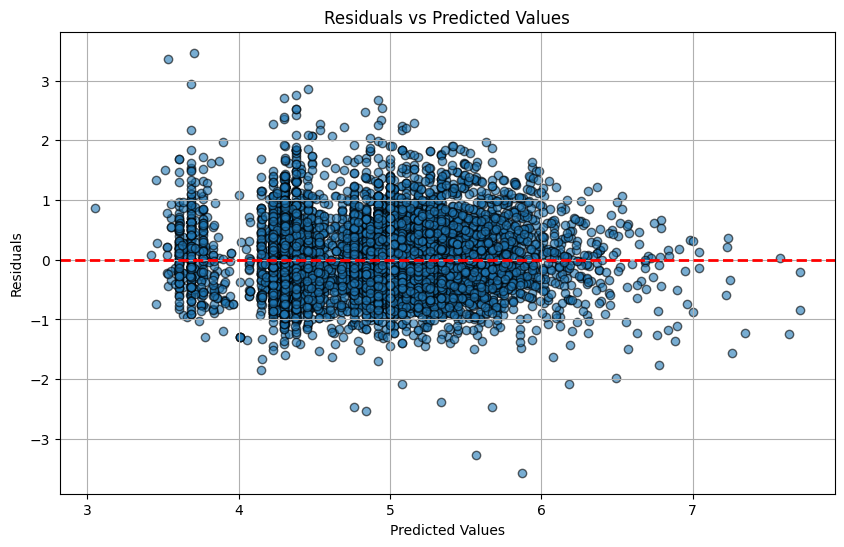

In [36]:
# plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()